## 7. トピック分析
### 7.1 トピックモデルとは
テキストにおける名詞は文章の主題右あ内容から大きく影響を受けるため、人による読みを経なくても、語句を集計したデータから、テキストの話題を推定できる可能性がある。
テキストをテキスト内に出現する毒と頻度によってのみ捉えるという点で、主成分分析や対応分析、潜在意味解析の手法と変わらないが、
線形代数の行列分解をベースとした方法では、高次元データの場合にデータの内在構造を十分に理解できない可能性がある。  
このような問題の改善のため、**確率的潜在意味解析(pLSA)**や**潜在ディリクレ配分法(LDA)**などが提案された。  
これらを総称して**トピックモデル**と呼ぶ。  
各テキストは複数のトピックの確率分布によって構成され、そして各トピックはさまざまな語句とその出現頻度によって表される。  
### 7.2 確率的潜在意味解析pLSA
抽出した語句を手掛かりとして、トピックを推定するものであり、語句は何らかの確率モデルに従って生成されるという考え方を基本とする。  
#### pLSAとは
$\boldsymbol{d}=\{d_1,d_2,\cdots,d_M\}$は文書・テキストのベクトル、$\boldsymbol{z}=\{z_1,z_2,\cdots,z_M\}$は潜在的トピックモデル、   
$\boldsymbol{w}=\{w_1,w_2,\cdots,w_M\}$は単語・語句のベクトルとする。
文書と語句が同時に現れる確率モデルは、トピックが決まった後の条件付き確率モデルで表すことができる。  
$$
p(\boldsymbol{w},\boldsymbol{d})=p(\boldsymbol{z})p(\boldsymbol{d}|\boldsymbol{z})p(\boldsymbol{w}|\boldsymbol{z})
$$
ある文書$\boldsymbol{d}$にある語句$\boldsymbol{w}$が現れる確率$p(\boldsymbol{w},\boldsymbol{d})$は、あるトピックが生じる確率$p(\boldsymbol{z})$と、あるトピックが与えられたときにその文書が生成される確率$p(\boldsymbol{d},\boldsymbol{z})$と、あるトピックが与えられたときにその語句が現れる確率$p(\boldsymbol{w},\boldsymbol{z})$によって表すことができる。

#### pLSAのアルゴリズム
文書$d_i$と語句$w_j$については、トピック$z_k$を介して以下のようにモデルを構築することができる。  
式の中の$p(w_j|z_k)$と$p(z_k|d_i)$は、推定が必要となるパラメータである。  
$$
\begin{align}
p(d_i,w_j)&=p(d_i)p(w_j|d_i)\\
&=p(d_i)\sum_{k=1}^Kp(w_j|z_k)p(z_k|d_i)
\end{align}
$$

pLSAは集計した、BOWデータに基づいて、最尤推定法を用いて$p(w_j|z_k)$と$p(z_k|d_i)$を推定する。  
BOWデータの**カテゴリカル分布**の対数尤度関数を示す。  
$p(d_i,w_j)$は文書$d_i$における語句$w_j$の確率、$n(d_i,w_j)$における語句$w_j$の出現の度数である。  
$$
\begin{align}
l&=\log{\prod_{i=1}^M\prod_{j=1}^N}p(d_i,w_j)^{n(d_i,w_j)}\\
&=\sum_{i=1}^M\sum_{j=1}^Nn(d_i,w_j)\log{\biggl\{p(d_i)\sum_{k=1}^Kp(z_k|d_i)p(w_j|z_k) \biggr\}}
\end{align}
$$

隠れ変数トピック$z_k$があるため、直接求めることが困難であり、EMアルゴリズムなどを用いて推測する。  
E-stepでは、段階$t$で与えられた$p(z_k|d_i)^{(t)}$、$p(w_j|z_k)^{(t)}$のもとで、隠れ変数の事後確率の期待値を与える。  
$$
p(z_k|d_i,w_j)^{(t)}=\frac{p(z_k|d_i)^{(t)}p(w_j|z_k)^{(t)}}{\sum_{h=1}^Kp(z_h|d_i)^{(t)}p(w_j|z_h)^{(t)}}
$$

M-stepでは、期待値を用いて最尤推定値を求める、$n(d_i)$は文書$d_i$における語句の総数である。  
$$
p(z_k|d_i)^{(t+1)}=\frac{\sum_{j=1}^Nn(d_i,w_j)p(z_k|d_i,w_j)^{(t)}}{n(d_i)}\\
p(w_j|z_k)^{(t+1)}=\frac{\sum_{j=1}^Nn(d_i,w_j)p(z_k|d_i,w_j)^{(t)}}{\sum_{j=1}^N\sum_{j=1}^Mn(d_i,w_j)p(z_k|d_i,w_j)^{(t)}}
$$

この計算を収束するまで繰り返す。

pLSAでは、$U=p(\boldsymbol{d}|\boldsymbol{z})$、$V^T=p(\boldsymbol{w}|\boldsymbol{z})$、$\Sigma=p(\boldsymbol{z})$のように、特異値分解の結果と対応付けることができる。  
しかし、トピックは潜在的であり直接求めることは不可能であるため、潜在パラメータを用いた推測アルゴリズムを用いる。  
もっとも用いられているのは**EMアルゴリズム**である。  
EMアルゴリズムによる推定のための最低限の条件として、トピックの数を指定することが必要である。
pLSAの分析の結果は、個体がトピックに属する確率と変数が各トピックに属する確率の２つの部分になる。
#### pLSA分析の例
参考書のサポートページで提供されている作文データを扱う。

In [2]:
import pandas as pd
import numpy as np

d1 = pd.read_csv('study/参考書/テキストアナリティクス/sakubun3f.csv', encoding='shift-jis', index_col=0)
d1 = d1.iloc[:,:-1]
d1

,人,友達,車,自分,事故,人間,食,文化,寿司,日本人,...,実家,クラス,外国,男性,交通,家,親友,味,母,相手
akke2,8,20,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
akke5,0,0,3,2,3,0,0,0,0,0,...,3,0,0,0,1,0,0,0,0,0
akke9,2,0,0,1,0,0,3,0,0,2,...,0,0,6,0,0,1,0,0,0,0
ataka2,11,13,0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
ataka5,4,0,6,2,10,1,0,0,0,0,...,2,0,0,0,3,0,0,0,0,0
ataka9,2,0,0,4,0,0,4,1,0,1,...,3,0,0,0,0,0,0,1,0,0
kana2,8,6,0,3,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
kana5,1,4,11,3,4,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
kana9,0,1,0,1,0,0,0,0,22,0,...,0,0,0,0,0,2,0,1,0,0
kato2,14,20,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,9,0,0,4


トピックの数$k=3$にしたpLSAの結果を示す。

https://qiita.com/HZama/items/561cb240620991d3a0e2

In [7]:
def initialize(Z, D, W):
    """
    初期化
    """
    # P(z)
    Pz = np.random.rand(Z)
    # P(d|z)
    Pd_z = np.random.rand(Z, D)
    # P(w|z)
    Pw_z = np.random.rand(Z, W)

    Pz /= np.sum(Pz)
    Pd_z /= np.sum(Pd_z, axis=1)[:, None]
    Pw_z /= np.sum(Pw_z, axis=1)[:, None]
    return Pz, Pd_z, Pw_z

def em_algorithm(N, Pz, Pd_z, Pw_z):
    """
    EMアルゴリズム
    """
    # P(x|z)の分子=∑ [N/∑zP(z)P(x|z)P(w|z)] P(z)P(x|z)P(w|z)
    # P(z|d,w) = ΣP(z)P(x|z)P(w|z)
    Pz_dw = np.einsum('k,ki,kj->kij', Pz, Pd_z, Pw_z)
    tmp = N / np.sum(Pz_dw, axis=0)
    tmp[np.isnan(tmp)] = 0
    tmp[np.isinf(tmp)] = 0
    
    # P(z)
    Pz = np.einsum('ij,kij->k', tmp, Pz_dw)
    
    # P(d|z),P(w|z)
    Pd_z = np.einsum('ij,kij->ki', tmp, Pz_dw)
    Pw_z = np.einsum('ij,kij->kj', tmp, Pz_dw)

    Pz /=  np.sum(Pz)
    Pd_z /= np.sum(Pd_z, axis=1)[:, None]
    Pw_z /= np.sum(Pw_z, axis=1)[:, None]
    return Pz, Pd_z, Pw_z

def llh(N,Pz,Pd_z,Pw_z):
    """
    対数尤度の計算
    """
    Pdw = np.einsum('k,ki,kj->ij', Pz, Pd_z, Pw_z)
    Pdw /= np.sum(Pdw)
    lPdw = np.log(Pdw)
    lPdw[np.isinf(lPdw)] = -1000
    res = np.sum(N * lPdw)
    return res

In [18]:
N = np.array(d1) # データ
Z = 3 # トピックの数
D = N.shape[0]
W = N.shape[1]

k=200 # 繰り返し回数
t=1.0e-7 # 収束条件

# 初期化
Pz, Pd_z, Pw_z = initialize(Z, D, W)

prev_llh = 100000
for i in np.arange(k):
    # EMアルゴリズム
    Pz, Pd_z, Pw_z = em_algorithm(N,Pz, Pd_z, Pw_z)
    # 対数尤度の計算
    new_llh = llh(N, Pz, Pd_z, Pw_z)

    # 判定
    if abs((new_llh - prev_llh) / prev_llh) < t:
        break
        
    prev_llh = new_llh
print(prev_llh)

-5173.357092736456


以下の表の数値は各テキストが3つのトピックに属する確率である。
たとえばakka2は確率値がもっとも高いのはTopic1である。
yuka2はどれか1つのトピックが圧倒的に高いわけではない、これはテキストは複数のトピックから確率的に生成され、トピックが不明確であることを示している。

In [28]:
from IPython.display import display

Pd_z /= np.sum(Pd_z,axis=0)

Pd_z_df = pd.DataFrame(Pd_z.T, index=d1.index, columns=['Topic1', 'Topic2', 'Topic3'])
display(Pd_z_df.head(3))
display(Pd_z_df.tail(3))

,Topic1,Topic2,Topic3
akke2,1.000000e+00,3.942923e-42,4.599221e-33
akke5,2.770552e-36,1.368031e-33,1.000000e+00
akke9,1.161951e-09,1.000000e+00,9.729048e-21


,Topic1,Topic2,Topic3
yuka2,4.569414e-01,4.899028e-01,5.315571e-02
yuka5,1.365568e-01,2.464691e-22,8.634432e-01
yuka9,6.236217e-11,1.000000e+00,1.751409e-18


変数に対する推測値を次に表に示す。  
数値は、各語句が各トピックに出現する確率である。
すべての語句の値の合計は1となる。

In [21]:
Pw_z_df = pd.DataFrame(Pw_z.T, index=d1.columns, columns=['Topic1', 'Topic2', 'Topic3'])
Pw_z_df.head()

,Topic1,Topic2,Topic3
人,2.353504e-01,4.813212e-02,8.186464e-02
友達,3.156197e-01,1.905902e-27,3.178602e-29
車,1.414320e-41,3.969782e-38,4.203888e-01
自分,1.127988e-01,3.568954e-02,1.024044e-01
事故,4.186078e-70,1.707097e-268,1.401296e-01


トピック内の語句の確率は棒グラフなどで視覚的に示すことができる。
バブルグラフ、モザイクグラフ、ワードクラウドの例を示す。

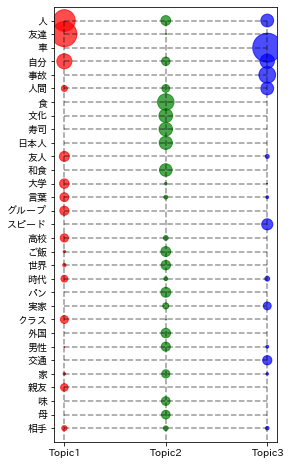

In [22]:
import matplotlib.pyplot as plt
import japanize_matplotlib

x1 = np.arange(W)
x2 = np.arange(Z)
xx1, xx2 = np.meshgrid(x1, x2)

s = np.array(Pw_z_df).T.ravel()*2000

colorlist = ["r", "g", "b"]
c = list(map(lambda x: colorlist[x], list(np.repeat(np.arange(Z), W).ravel())))

plt.figure(figsize=(4,8))

plt.scatter(xx2,xx1,s=s, color=c, alpha=.7);
plt.vlines(x2, 0, 32, linestyles='--', color='black', alpha=.4);
plt.hlines(x1, 0, 2, linestyles='--', color='black', alpha=.4);
plt.xticks(np.arange(0,3), Pw_z_df.columns);
plt.yticks(np.arange(0,31), Pw_z_df.index);
plt.ylim([31,-1]);

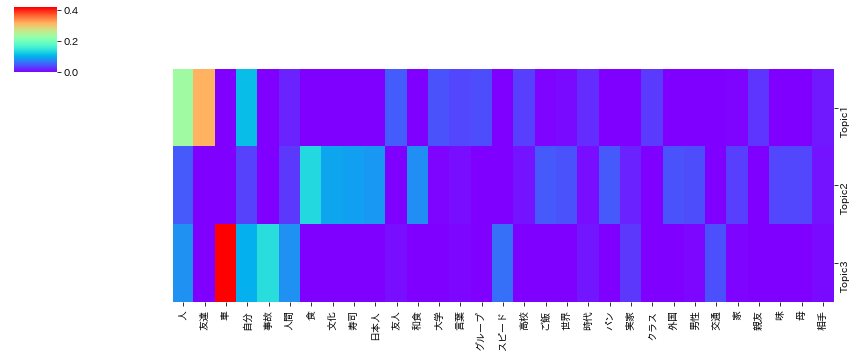

In [29]:
import seaborn as sns

sns.clustermap(Pw_z_df.T,row_cluster=False,col_cluster=False, figsize=(12, 5), cmap='rainbow');

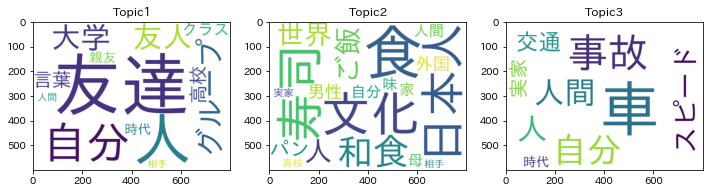

In [31]:
from wordcloud import WordCloud

def make_wordcloud(df, d, ax):
    word_list = []
    for i in range(len(df)):
        word_list += [df.index[i]] * int(df.iloc[i, d]*100)
    word_list = ' '.join(word_list)

    fpath = "C:/Users/tanak/anaconda3/envs/tanaka_env1/Library/fonts/ipaexg.ttf"
    wordcloud = WordCloud(background_color="white",font_path=fpath,width=800,height=600,min_font_size=2, collocations = False)
    wordcloud.generate_from_text(word_list)

    ax.imshow(wordcloud);

fig ,axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

make_wordcloud(Pw_z_df, d=0, ax=axes[0]);
axes[0].set_title('Topic1');

make_wordcloud(Pw_z_df, d=1, ax=axes[1]);
axes[1].set_title('Topic2');

make_wordcloud(Pw_z_df, d=2, ax=axes[2]);
axes[2].set_title('Topic3');

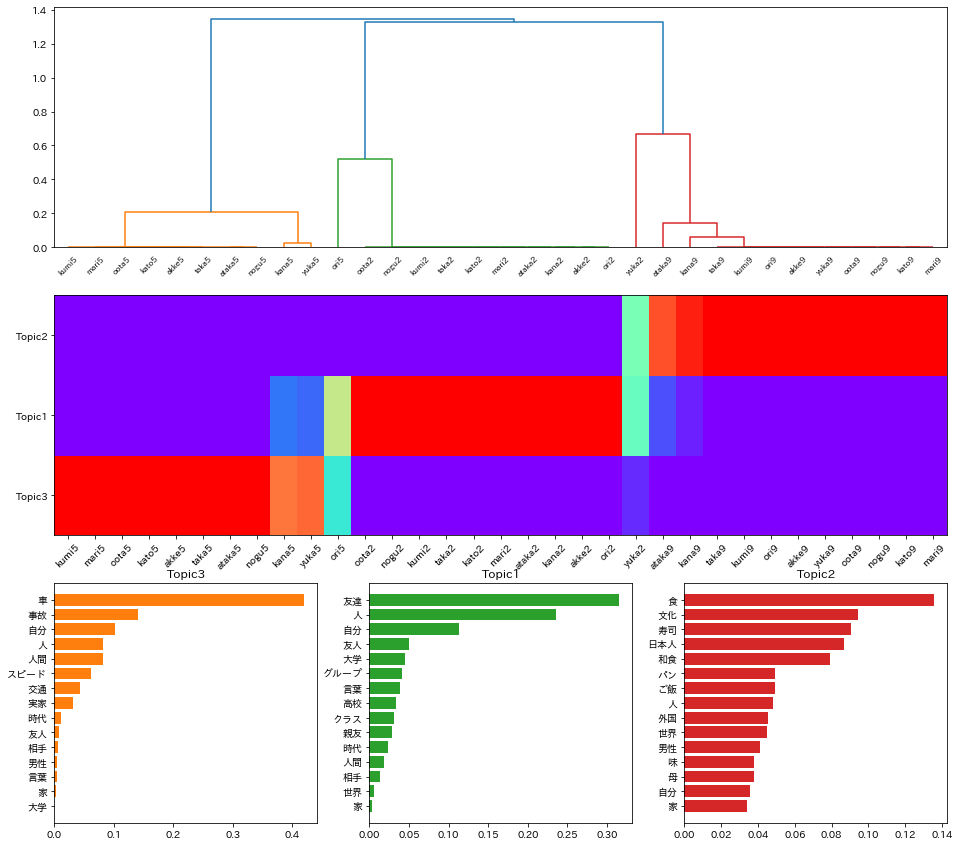

In [144]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

fig = plt.figure(figsize=(16,15))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(337)
ax4 = fig.add_subplot(338)
ax5 = fig.add_subplot(339)
colors = ['C1','C2','C3']
topics = ['Topic3', 'Topic1', 'Topic2']

row_clusters = linkage(Pd_z_df.values, method='average', metric='euclidean')
row_dendr = dendrogram(row_clusters, labels=Pd_z_df.index, ax=ax1)

ax2.pcolor(Pd_z_df[topics].T[row_dendr['ivl']], cmap='rainbow')
ax2.set_yticks(np.arange(0.5,3.5));
ax2.set_yticklabels(topics);
ax2.set_xticks(np.arange(0.5,len(row_dendr['ivl'])+0.5));
ax2.set_xticklabels(row_dendr['ivl'], rotation=45);

for i, (s, ax) in enumerate(zip(topics, [ax3, ax4, ax5])):
    d_tmp = Pw_z_df.sort_values([s], ascending=True);
    d_tmp = d_tmp[-15:]
    ax.barh(y=np.arange(len(d_tmp)), width=d_tmp[s], color=colors[i]);
    ax.set_yticks(np.arange(0,len(d_tmp)));
    ax.set_yticklabels(d_tmp.index);
    ax.set_title(s)

トピック2は、食、文化、寿司が相対的に相対的に長いことから「食」に関するものであると推測される。  
このトピックには、番号9がついたテキストが属する。  
トピック3は、車、事故、スピードが相対的に長いことから「車。交通」に関するものであり、番号5のついたものが属する。  
トピック1は、友達、人、友人などが相対的に長いことから「友達」に関するものと考えられ、番号2のついたものが属する。

作文のタイトルの番号(aka2の2など)がトピックを表しているので、比較的よく分類できているといえる。

### 7.3 潜在ディリクレ配分法LDA
pLSAは用いたデータへの依存性が強いため、過学習しやすく汎化能力が問題とされている。  
そこで、**潜在ディリクレ配分法(LDA)**が提案されている。  
ディリクレは確率分布の**ディリクレ分布**を指す。  
LDAは確率分布を生成し、その確率分布を用いて推定を行うため、汎化性能がpLSAより高い。
LDAは頻度データを用いて、各テキストが$k$個のトピックに属する確率を推定すると同時に、  
各語句のトピック内での重要度・確率値を推定する。  
LDAでは、まずディリクレ分布を用いて多項分布に用いるパラメータを推定し、次に多項分布を用いて推定すべき確率値を推定する。  

#### LDAのアルゴリズム
文書ごとのトピックの確率分布のパラメータ$\theta_d$を推定したうえで、トピックに属する確率を推定し、  
確率分布のパラメータ$\varphi_k$を推定したうえで、語句が各トピックに属する確率を推定する。  
確率$\theta_d$、$\varphi_k$の推定には、それぞれハイパーパラメータ$\boldsymbol{\alpha}$、$\boldsymbol{\beta}$を用いる。  
この推定には、ギブスサンプラー法やEMアルゴリズムがよく用いられる。  
**ギブスサンプラー法**は、直接サンプリングが難しい確率分布に対し、マルコフ連鎖を用いて近似するサンプル列を生成する方法である。  
LDAの処理の概要を示す
1. ディリクレ分布を用いて$\boldsymbol{\theta}_d$と$\boldsymbol{\varphi}_k$を推定する  
　(a) トピックス分布$\boldsymbol{\theta}_d\sim Dir(\boldsymbol{\alpha}),d=1,2,\cdots,M$を推定する  
　(b) 語句分布$\boldsymbol{\varphi}_k\sim Dir(\boldsymbol{\beta}),k=1,2,\cdots,K$を推定する  
2. 推定した$\boldsymbol{\theta}_d$と$\boldsymbol{\varphi}_k$をパラメータとし、多項分布を用いてトピックの確率と語句を推定する  
　(a)トピック分布$z_{di}\sim Multi(\boldsymbol{\theta}_d),i=1,2,\cdots,N$を生成する  
　(b)語句分布$w_{di}\sim Multi(\varphi{\theta}_k),=1,2,\cdots,N$を生成する  

#### LDAの分析例
3つのトピックを指定し、推測した結果の主な部分を示す。  
文書が各トピックに属する確率の推定値の合計は、近似的に1になる。

In [145]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(max_iter=25,
          learning_method='batch',
          n_components=3)

pd_z = lda.fit_transform(d1)
pd_z_df = pd.DataFrame(pd_z, index=d1.index, columns=['Topic1', 'Topic2', 'Topic3'])
pd_z_df[:5]

,Topic1,Topic2,Topic3
akke2,0.008969,0.982143,0.008889
akke5,0.959936,0.019966,0.020098
akke9,0.015044,0.015773,0.969183
ataka2,0.008972,0.982280,0.008748
ataka5,0.976854,0.012131,0.011015


In [146]:
pw_z = np.array(d1.T)@pd_z
pw_z /= np.sum(pw_z, axis=0)
pw_z_df = pd.DataFrame(pw_z, index=d1.columns, columns=['Topic1', 'Topic2', 'Topic3'])
pw_z_df[:5]

,Topic1,Topic2,Topic3
人,0.086878,0.215501,0.057837
友達,0.016534,0.281818,0.008486
車,0.389462,0.015041,0.006030
自分,0.102037,0.103231,0.044447
事故,0.132857,0.003200,0.001824


pLSA同様に結果を樹形図と棒グラフで示す。
この結果は基本的にはpLSAと同じである。(Topic番号は異なる。)

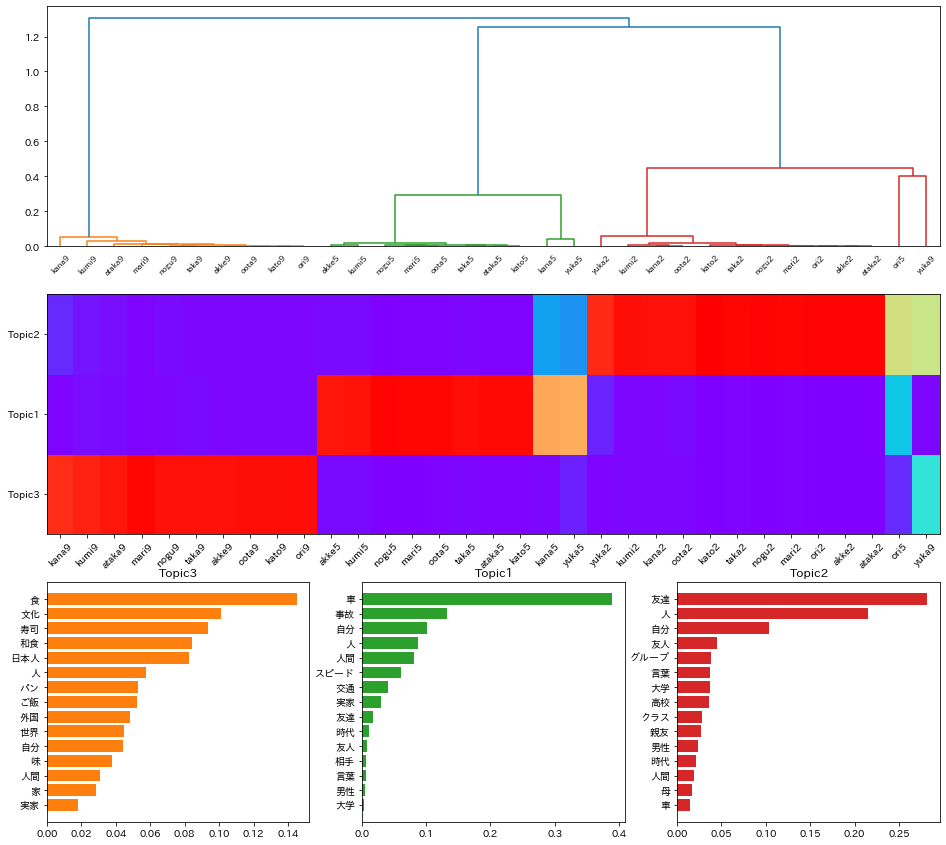

In [150]:
fig = plt.figure(figsize=(16,15))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(337)
ax4 = fig.add_subplot(338)
ax5 = fig.add_subplot(339)
colors = ['C1','C2','C3']
topics = ['Topic3', 'Topic1', 'Topic2']

row_clusters = linkage(pd_z_df.values, method='average', metric='euclidean')
row_dendr = dendrogram(row_clusters, labels=pd_z_df.index, ax=ax1)

ax2.pcolor(pd_z_df[topics].T[row_dendr['ivl']], cmap='rainbow')
ax2.set_yticks(np.arange(0.5,3.5));
ax2.set_yticklabels(topics);
ax2.set_xticks(np.arange(0.5,len(row_dendr['ivl'])+0.5));
ax2.set_xticklabels(row_dendr['ivl'], rotation=45);

for i, (s, ax) in enumerate(zip(topics, [ax3, ax4, ax5])):
    d_tmp = pw_z_df.sort_values([s], ascending=True);
    d_tmp = d_tmp[-15:]
    ax.barh(y=np.arange(len(d_tmp)), width=d_tmp[s], color=colors[i]);
    ax.set_yticks(np.arange(0,len(d_tmp)));
    ax.set_yticklabels(d_tmp.index);
    ax.set_title(s)

#### トピックの数について
トピックモデルでは、複雑度の指標としてPerplexityをモデルの評価指標として用いている。  
**Perplexity**はモデルにおける正解を得る難しさを表す指標である。  
生成したモデルが$\hat{M}$があり、  
いくつかの文書から取り出された語句ベクトル$w_{d,i}^{test},i=1,2,\cdots,I,d_t=1,2,\cdots,M$に対する対数尤度$l$を求めると
$$
l(w^{test}|\hat{M})=\sum_{d_t=1}^{M_t}\sum_{i=1}^I\log{[p(w_{d,i}^{test}|\hat{M})]}
$$
となり、語句に対するPerplexityの指標$PPL(w^{test}|\hat{M})$は次のように定義される。  
$$
PPL(w^{test}|\hat{M})=\exp{\biggl\{-\frac{l(w^{test}|\hat{M})}{\sum_{d_t=1}^{M_t}n_{d_t}} \biggr\}}
$$
この$PPL$の値が低いほどモデルの性能が良いとされている。  
この指標を用いて$k$を求める方法が提案されている。  
  
例として、$k=2,\cdots,10$についてモデルを作成し、Perplexityを求めた結果のプロットを示す。  

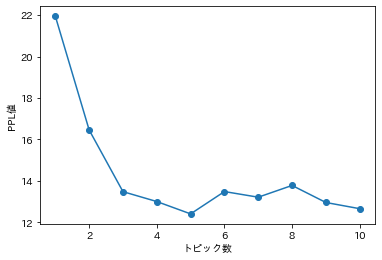

In [151]:
ppl = []
for i in np.arange(1,11):
    lda = LDA(max_iter=25,
              learning_method='batch',
              n_components=i).fit(d1)

    ppl += [lda.perplexity(d1)]

plt.plot(np.arange(1,11), ppl, '-o');
plt.xlabel('トピック数');
plt.ylabel('PPL値');

最小値をとるのが$k=5$となったが、現実($k=3$)とは異なる結果となった。